In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

In [61]:
df=pd.read_csv("diabetes.csv")
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Create arrays for features and response variables

In [64]:
#extarct dependent and independent variables

y=df['Outcome']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [65]:
df=df.drop(['Outcome'],axis=1)
x=df
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [66]:
#split the datatset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [67]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_train)

[[0.         0.76262626 0.73770492 ... 0.62742176 0.12285959 0.        ]
 [0.05882353 0.41919192 0.55737705 ... 0.27123696 0.23116438 0.1       ]
 [0.11764706 0.61616162 0.57377049 ... 0.54843517 0.10958904 0.1       ]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02739726 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09246575 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.2380137  0.8       ]]


# Building ,predicting and evaluating the NN model

In [69]:
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=1000)
classifier.fit(x_train,y_train)

x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

In [70]:
print(y_test.values)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]
[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 1 1 0 0 0 0 0]


In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[134  23]
 [ 33  41]]


In [72]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_train,x_pred)
print(cm2)

[[289  54]
 [ 60 134]]


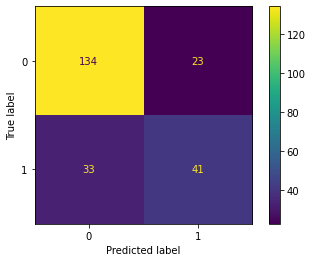

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

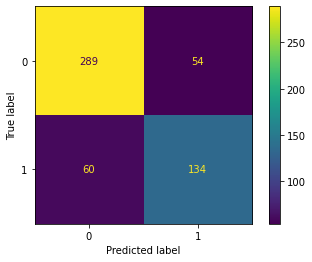

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=classifier.classes_)
disp2.plot()

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label=0)))

Accuracy score: 0.7575757575757576
Precision score: 0.8023952095808383
Recall score: 0.8535031847133758
F1 score: 0.8271604938271604


In [77]:
classifier.coefs_

[array([[ 7.79554696e-01,  2.75110910e-01,  2.86074053e-04,
         -1.32444898e-02,  3.10854805e-02,  4.55254600e-01,
         -3.54162973e-01, -5.10881740e-01],
        [ 6.14263693e-01,  5.02474892e-01,  1.39756640e-06,
         -4.05240997e-01, -4.49551842e-02, -3.24196867e-01,
          9.99217275e-01, -4.87015865e-02],
        [ 5.34171071e-01, -1.13765370e-01, -1.76290418e-05,
         -2.95079482e-02,  7.96167269e-02,  2.73764640e-01,
         -2.72662114e-01,  4.15438160e-02],
        [-1.44014583e-01,  1.26482053e-01,  1.65882910e-05,
         -5.23211219e-02,  4.33814836e-01, -5.12151597e-02,
          1.79414710e-01, -1.42720333e-01],
        [ 1.65754278e-01, -5.17183134e-02,  2.11603723e-06,
          5.07874226e-01,  5.89420531e-01, -3.44818632e-01,
          1.08231874e-01,  2.81148239e-01],
        [-1.38212705e-01,  7.19701357e-01, -2.03046953e-08,
         -2.42146625e-01, -3.74195991e-01,  2.08919838e-02,
          4.89137740e-01,  1.53319121e-01],
        [-3.2934

In [78]:
classifier.intercepts_

[array([-0.02155608, -0.40536107, -0.49682114, -0.35169497,  0.43393141,
         0.62436456, -0.43017303,  0.46351508]),
 array([-0.15020924, -0.06541909,  0.18544703, -0.53572557,  0.18931245,
         0.28957387, -0.22286468,  0.14057677]),
 array([-0.62463837, -0.0958162 , -0.44517378,  0.39513898,  0.53898801,
         0.81489806,  0.04887366,  0.07014173]),
 array([0.08142859])]